# Defining the problem

XYZ is an investment firm. Due to the continuos growth in the taxi industry, XYZ wishes to invest on it, but before taking a final decision they would like to understand the market as part of their go to market strategy. 
We have information about 2 companies in the cab industry and wish to find insights and help the company decide in which company to invest in.

#### Importing Libraries

In [ ]:
# Familiar imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#### Reading the data

In [2]:
# Load the training data
Cab_Data = pd.read_csv("datasets/Cab_Data.csv")
City = pd.read_csv("datasets/City.csv")
Customers = pd.read_csv("datasets/Customer_ID.csv")
Transactions = pd.read_csv("datasets/Transaction_ID.csv")


In [3]:
# Preview the data
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
Customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
Transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Exploratory Data Analysis
#### Data Quality Check

In [7]:
#Check if there are columns with null values
Cab_Data.isnull().any()

Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
dtype: bool

In [8]:
#Make sure that quality and data types match our features
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


We can see that the column 'Date of Travel' is an integer type, so we will convert this column into date format.






In [14]:
import datetime as dt

Cab_Data['Date of Travel'] = pd.TimedeltaIndex(Cab_Data['Date of Travel'], unit='d') + dt.datetime(1899, 12, 30)

In [17]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [18]:
Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [20]:
Cab_Data.shape

(359392, 7)

In [21]:
Cab_Data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


We will create a new column 'Profit' to know the exact profit of each trip.

In [22]:
Cab_Data['Profit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']

In [24]:
Cab_Data['Profit %'] = Cab_Data['Profit']/Cab_Data['Price Charged']*100

In [93]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit %
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,15.450869
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,6.601026
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,22.019169
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,6.835718
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,14.695516


In [28]:
Company_summary = Cab_Data.groupby('Company')

In [29]:
Company_summary.mean()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Profit %
Company,,,,,,
Pink Cab,1.022394e+07,22.559917,310.800856,248.148682,62.652174,17.380833
Yellow Cab,1.021978e+07,22.569517,458.181990,297.922004,160.259986,30.134544


## Before creating visualizations, I will create some hipothesis:

#### 1. Is any of the companies having any loss or are they both having profits?

As a investment company it is important to make sure that the company where money will be invested is making profit and not generating any loss, so I will visualize the new profit % column to have a general idea of the cab industry.

/home/danielaaz04/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


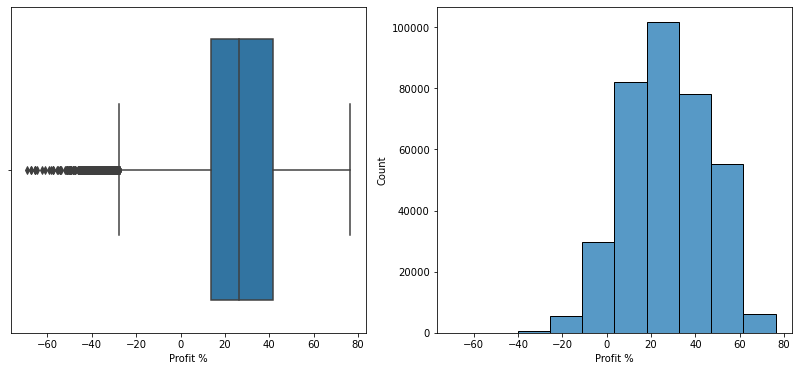

In [37]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(Cab_Data['Profit %'])

plt.subplot(1,2,2)
sns.histplot(Cab_Data['Profit %'], bins = 10)
plt.show()

The image shows some possible negative outliers so I will use IQR rule to identify potential outliers

In [41]:
stat = Cab_Data['Profit %'].describe()
print(stat)

count    359392.000000
mean         27.128413
std          18.550100
min         -69.301505
25%          13.855876
50%          26.430302
75%          41.611989
max          76.202636
Name: Profit %, dtype: float64


In [42]:
IQR = stat['75%']-stat['25%']
upper = stat['75%'] + 1.5*IQR
lower = stat['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 83.24615900320492 and -27.77829322077634.


In [60]:
Cab_Data[Cab_Data['Profit %'] < -27]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit %
53,10000064,2016-01-06,Pink Cab,DALLAS TX,9.45,73.43,98.280,-24.850,-33.841754
54,10000065,2016-01-11,Pink Cab,DALLAS TX,4.90,35.76,49.490,-13.730,-38.394855
57,10000068,2016-01-11,Pink Cab,DALLAS TX,4.52,38.31,52.884,-14.574,-38.042287
58,10000069,2016-01-07,Pink Cab,DALLAS TX,22.40,175.80,246.400,-70.600,-40.159272
59,10000070,2016-01-02,Pink Cab,DENVER CO,7.02,61.30,82.836,-21.536,-35.132137
...,...,...,...,...,...,...,...,...,...
319973,10392469,2018-10-17,Pink Cab,PITTSBURGH PA,47.60,421.35,542.640,-121.290,-28.786045
336628,10412312,2018-11-20,Pink Cab,PITTSBURGH PA,7.20,59.90,82.080,-22.180,-37.028381
336629,10412313,2018-11-23,Pink Cab,PITTSBURGH PA,31.03,252.55,344.433,-91.883,-36.382103
340138,10416508,2018-11-29,Pink Cab,PHOENIX AZ,26.40,230.48,311.520,-81.040,-35.161402


In [57]:
Cab_Data[Cab_Data['Profit %'] > 83]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit %


We will remove the data with outbounds in the profit column.

In [67]:
new_Cab_Data = Cab_Data[Cab_Data['Profit %'] > -27]

In [68]:
new_stat = new_Cab_Data['Profit %'].describe()
print(new_stat)

count    358726.000000
mean         27.242730
std          18.373721
min         -26.984403
25%          13.934046
50%          26.472569
75%          41.644543
max          76.202636
Name: Profit %, dtype: float64


#### 2. How does the Company affect the relationship between kms travelled and price charged?

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

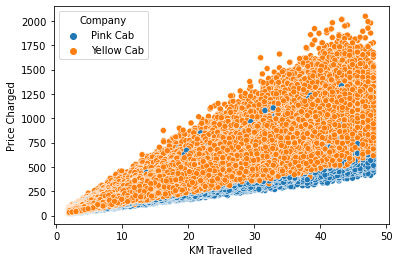

In [92]:
sns.scatterplot(x=new_Cab_Data['KM Travelled'], y=new_Cab_Data['Price Charged'], hue=new_Cab_Data['Company'])

There is clearly a linear positive relation between the kms travelled and the price charged, however, as more kms are being travelled, the price increases much more in Yellow Cab than in Pink Cab. 

#### 3. What is the best season of the year for each company? Is there any seasonality?

In [74]:
new_Cab_Data['month_year'] = pd.to_datetime(new_Cab_Data['Date of Travel']).dt.to_period('M')
new_Cab_Data.head()

/home/danielaaz04/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit %,month_year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,15.450869,2016-01
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,6.601026,2016-01
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,22.019169,2016-01
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,6.835718,2016-01
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,14.695516,2016-01


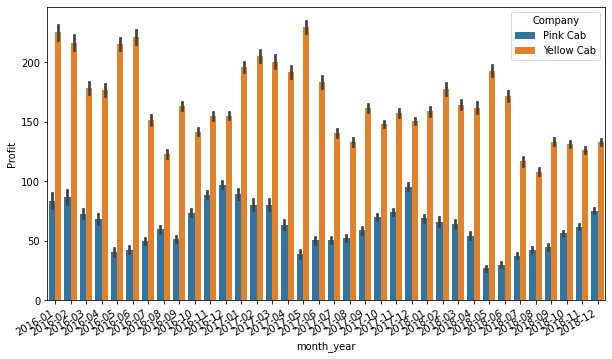

In [84]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x=new_Cab_Data['month_year'],y=new_Cab_Data['Profit'],hue=new_Cab_Data['Company'])
fig.autofmt_xdate()
plt.show()


Yes there is a seasonal component in both companies, and they are opposed to each other. While profit for Pink Cab improves between January and March, it decreases for Yellow cab during those months. However, when profits for Pink Cab decreases between May and June, it improves in Yellow cab, and this seasonal pattern repeates every year.

As an initial exploratory data analysis, I have covered 3 hipothesis:

1. Is any of the companies having any loss or are they both having profits?
2. How does the Company affect the relationship between kms travelled and price charged.
3. Is there any pattern or seasonal component in any of the companies ?